# I. Loading Dataset

In [2]:
import os
import zipfile
from os import path, getcwd

In [3]:
!wget https://sci2s.ugr.es/sites/default/files/files/ComplementaryMaterial/CoralClassification/StructureRSMAS.zip
!unzip StructureRSMAS.zip

--2021-05-21 10:46:12--  https://sci2s.ugr.es/sites/default/files/files/ComplementaryMaterial/CoralClassification/StructureRSMAS.zip
Resolving sci2s.ugr.es (sci2s.ugr.es)... 150.214.190.154
Connecting to sci2s.ugr.es (sci2s.ugr.es)|150.214.190.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136733726 (130M) [application/zip]
Saving to: ‘StructureRSMAS.zip’

StructureRSMAS.zip  100%[===================>] 130.40M  11.1MB/s    in 12s     

2021-05-21 10:46:26 (10.5 MB/s) - ‘StructureRSMAS.zip’ saved [136733726/136733726]

Archive:  StructureRSMAS.zip
   creating: StructureRSMAS/
   creating: StructureRSMAS/SSID/
  inflating: StructureRSMAS/SSID/ssid06.jpg  
  inflating: StructureRSMAS/SSID/ssid22.jpeg  
  inflating: StructureRSMAS/SSID/ssid11.jpg  
  inflating: StructureRSMAS/SSID/ssid34.jpg  
  inflating: StructureRSMAS/SSID/ssid27.jpg  
  inflating: StructureRSMAS/SSID/ssid19.jpg  
  inflating: StructureRSMAS/SSID/ssid32.jpg  
  inflating: StructureRSMAS/SS

In [4]:
# list the directories
os.listdir("/content/StructureRSMAS/")

['GORG',
 'DANT',
 'SSID',
 'TUNI',
 'DSTR',
 'MALC',
 'PALY',
 'MONT',
 'ACER',
 'CNAT',
 'APAL',
 'MCAV',
 'SPO',
 'MMEA']

# II. EDA Preprocessing

The codes below are based on [Keras-MultiClass-Image-Classification](https://github.com/vijayg15/Keras-MultiClass-Image-Classification) by @vijayg15 with a few changes.

In [5]:
import random
from shutil import copyfile

In [6]:
import numpy as np
import pandas as pd

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

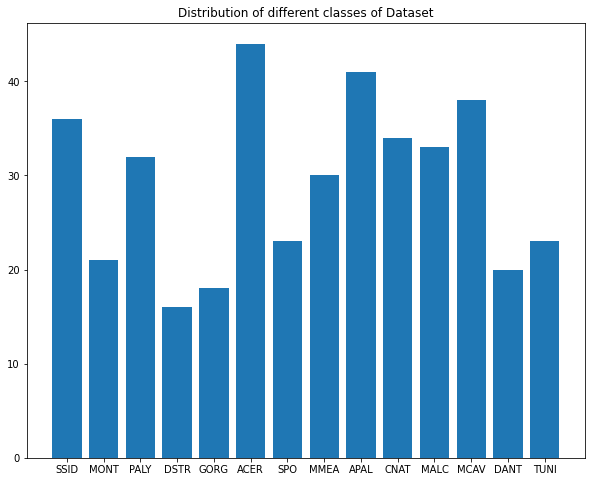

In [8]:
image_folder = ['SSID', 'MONT','PALY','DSTR','GORG','ACER','SPO','MMEA','APAL','CNAT','MALC','MCAV','DANT','TUNI']

nimgs = {}

for i in image_folder:
    nimages = len(os.listdir('/content/StructureRSMAS/'+i+'/'))
    nimgs[i]=nimages

plt.figure(figsize=(10, 8))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes of Dataset')
plt.show()

In [9]:
os.mkdir('/content/StructureRSMAS/training')
os.mkdir('/content/StructureRSMAS/testing')

os.mkdir('/content/StructureRSMAS/training/SSID')
os.mkdir('/content/StructureRSMAS/training/MONT')
os.mkdir('/content/StructureRSMAS/training/PALY')
os.mkdir('/content/StructureRSMAS/training/DSTR')
os.mkdir('/content/StructureRSMAS/training/GORG')
os.mkdir('/content/StructureRSMAS/training/ACER')
os.mkdir('/content/StructureRSMAS/training/SPO')
os.mkdir('/content/StructureRSMAS/training/MMEA')
os.mkdir('/content/StructureRSMAS/training/APAL')
os.mkdir('/content/StructureRSMAS/training/CNAT')
os.mkdir('/content/StructureRSMAS/training/MALC')
os.mkdir('/content/StructureRSMAS/training/MCAV')
os.mkdir('/content/StructureRSMAS/training/DANT')
os.mkdir('/content/StructureRSMAS/training/TUNI')

os.mkdir('/content/StructureRSMAS/testing/SSID')
os.mkdir('/content/StructureRSMAS/testing/MONT')
os.mkdir('/content/StructureRSMAS/testing/PALY')
os.mkdir('/content/StructureRSMAS/testing/DSTR')
os.mkdir('/content/StructureRSMAS/testing/GORG')
os.mkdir('/content/StructureRSMAS/testing/ACER')
os.mkdir('/content/StructureRSMAS/testing/SPO')
os.mkdir('/content/StructureRSMAS/testing/MMEA')
os.mkdir('/content/StructureRSMAS/testing/APAL')
os.mkdir('/content/StructureRSMAS/testing/CNAT')
os.mkdir('/content/StructureRSMAS/testing/MALC')
os.mkdir('/content/StructureRSMAS/testing/MCAV')
os.mkdir('/content/StructureRSMAS/testing/DANT')
os.mkdir('/content/StructureRSMAS/testing/TUNI')

In [10]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    test_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    test_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in test_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

In [11]:
SSID_SOURCE_DIR = '/content/StructureRSMAS/SSID/'
TRAINING_SSID_DIR = '/content/StructureRSMAS/training/SSID/'
TEST_SSID_DIR = '/content/StructureRSMAS/testing/SSID/'

MONT_SOURCE_DIR = '/content/StructureRSMAS/MONT/'
TRAINING_MONT_DIR = '/content/StructureRSMAS/training/MONT/'
TEST_MONT_DIR = '/content/StructureRSMAS/testing/MONT/'

PALY_SOURCE_DIR = '/content/StructureRSMAS/PALY/'
TRAINING_PALY_DIR = '/content/StructureRSMAS/training/PALY/'
TEST_PALY_DIR = '/content/StructureRSMAS/testing/PALY/'

DSTR_SOURCE_DIR = '/content/StructureRSMAS/DSTR/'
TRAINING_DSTR_DIR = '/content/StructureRSMAS/training/DSTR/'
TEST_DSTR_DIR = '/content/StructureRSMAS/testing/DSTR/'

GORG_SOURCE_DIR = '/content/StructureRSMAS/GORG/'
TRAINING_GORG_DIR = '/content/StructureRSMAS/training/GORG/'
TEST_GORG_DIR = '/content/StructureRSMAS/testing/GORG/'

ACER_SOURCE_DIR = '/content/StructureRSMAS/ACER/'
TRAINING_ACER_DIR = '/content/StructureRSMAS/training/ACER/'
TEST_ACER_DIR = '/content/StructureRSMAS/testing/ACER/'

SPO_SOURCE_DIR = '/content/StructureRSMAS/SPO/'
TRAINING_SPO_DIR = '/content/StructureRSMAS/training/SPO/'
TEST_SPO_DIR = '/content/StructureRSMAS/testing/SPO/'

MMEA_SOURCE_DIR = '/content/StructureRSMAS/MMEA/'
TRAINING_MMEA_DIR = '/content/StructureRSMAS/training/MMEA/'
TEST_MMEA_DIR = '/content/StructureRSMAS/testing/MMEA/'

APAL_SOURCE_DIR = '/content/StructureRSMAS/APAL/'
TRAINING_APAL_DIR = '/content/StructureRSMAS/training/APAL/'
TEST_APAL_DIR = '/content/StructureRSMAS/testing/APAL/'

CNAT_SOURCE_DIR = '/content/StructureRSMAS/CNAT/'
TRAINING_CNAT_DIR = '/content/StructureRSMAS/training/CNAT/'
TEST_CNAT_DIR = '/content/StructureRSMAS/testing/CNAT/'

MALC_SOURCE_DIR = '/content/StructureRSMAS/MALC/'
TRAINING_MALC_DIR = '/content/StructureRSMAS/training/MALC/'
TEST_MALC_DIR = '/content/StructureRSMAS/testing/MALC/'

MCAV_SOURCE_DIR = '/content/StructureRSMAS/MCAV/'
TRAINING_MCAV_DIR = '/content/StructureRSMAS/training/MCAV/'
TEST_MCAV_DIR = '/content/StructureRSMAS/testing/MCAV/'

DANT_SOURCE_DIR = '/content/StructureRSMAS/DANT/'
TRAINING_DANT_DIR = '/content/StructureRSMAS/training/DANT/'
TEST_DANT_DIR = '/content/StructureRSMAS/testing/DANT/'

TUNI_SOURCE_DIR = '/content/StructureRSMAS/TUNI/'
TRAINING_TUNI_DIR = '/content/StructureRSMAS/training/TUNI/'
TEST_TUNI_DIR = '/content/StructureRSMAS/testing/TUNI/'


In [12]:
split_size = .8

In [13]:
split_data(SSID_SOURCE_DIR, TRAINING_SSID_DIR, TEST_SSID_DIR, split_size)
split_data(MONT_SOURCE_DIR, TRAINING_MONT_DIR, TEST_MONT_DIR, split_size)
split_data(PALY_SOURCE_DIR, TRAINING_PALY_DIR, TEST_PALY_DIR, split_size)
split_data(DSTR_SOURCE_DIR, TRAINING_DSTR_DIR, TEST_DSTR_DIR, split_size)
split_data(GORG_SOURCE_DIR, TRAINING_GORG_DIR, TEST_GORG_DIR, split_size)
split_data(ACER_SOURCE_DIR, TRAINING_ACER_DIR, TEST_ACER_DIR, split_size)
split_data(SPO_SOURCE_DIR, TRAINING_SPO_DIR, TEST_SPO_DIR, split_size)
split_data(MMEA_SOURCE_DIR, TRAINING_MMEA_DIR, TEST_MMEA_DIR, split_size)
split_data(APAL_SOURCE_DIR, TRAINING_APAL_DIR, TEST_APAL_DIR, split_size)
split_data(CNAT_SOURCE_DIR, TRAINING_CNAT_DIR, TEST_CNAT_DIR, split_size)
split_data(MALC_SOURCE_DIR, TRAINING_MALC_DIR, TEST_MALC_DIR, split_size)
split_data(MCAV_SOURCE_DIR, TRAINING_MCAV_DIR, TEST_MCAV_DIR, split_size)
split_data(DANT_SOURCE_DIR, TRAINING_DANT_DIR, TEST_DANT_DIR, split_size)
split_data(TUNI_SOURCE_DIR, TRAINING_TUNI_DIR, TEST_TUNI_DIR, split_size)

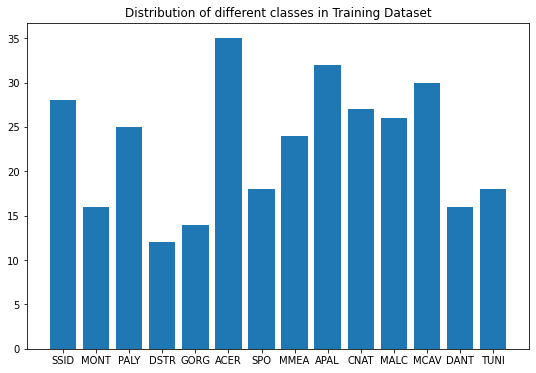

In [14]:
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/StructureRSMAS/training/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [15]:
for i in image_folder:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/content/StructureRSMAS/training/'+i+'/')))) 

Training SSID images are: 28
Training MONT images are: 16
Training PALY images are: 25
Training DSTR images are: 12
Training GORG images are: 14
Training ACER images are: 35
Training SPO images are: 18
Training MMEA images are: 24
Training APAL images are: 32
Training CNAT images are: 27
Training MALC images are: 26
Training MCAV images are: 30
Training DANT images are: 16
Training TUNI images are: 18


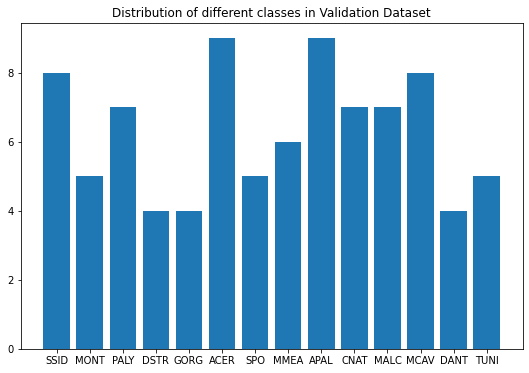

In [16]:
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/content/StructureRSMAS/testing/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()

In [17]:
for i in image_folder:
    print('Validation {} images are: '.format(i)+str(len(os.listdir('/content/StructureRSMAS/testing/'+i+'/')))) 

Validation SSID images are: 8
Validation MONT images are: 5
Validation PALY images are: 7
Validation DSTR images are: 4
Validation GORG images are: 4
Validation ACER images are: 9
Validation SPO images are: 5
Validation MMEA images are: 6
Validation APAL images are: 9
Validation CNAT images are: 7
Validation MALC images are: 7
Validation MCAV images are: 8
Validation DANT images are: 4
Validation TUNI images are: 5


# III. Defining Model and Using Augmentation

The codes below are based on Coursera: Convolutional Neural Networks in TensorFlow - Course 2 (Exercise 2: Cats vs. Dogs using augmentation) by DeepLearning.AI with a few changes.

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
# DEFINE A KERAS MODEL TO CLASSIFY CORALS
model = tf.keras.models.Sequential([
                                    # The first convolution
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The second convolution
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # The third convolution
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    # Flatten the results to feed into a DNN
                                    tf.keras.layers.Flatten(),
                                    # 512 neuron hidden layer
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    # There are 14 output neuron
                                    tf.keras.layers.Dense(14, activation='softmax')])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              # based on Gómez-Ríos et al. (2019) pg. 12, the metric used will be recall
              metrics=['accuracy', keras.metrics.Recall(name='recall')])

In [24]:
TRAINING_DIR = "/content/StructureRSMAS/training"
# All images will be rescaled by 1./255
# + data augmentation technique from Gómez-Ríos et al. (2019) pg. 20
train_datagen = ImageDataGenerator(rescale=1/255,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.4,
                                   rotation_range=6)

train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,  # This is the source directory for training images
    target_size= (150, 150),  # All images will be resized to 150x150
    # Because batch_size = 32 to 17 generated "ValueError: Expect x to be a non-empty array or dataset"
    # based on this: https://stackoverflow.com/questions/63243927/tensorflowlite-model-maker-valueerror-expect-x-to-be-a-non-empty-array-or-dat
    # batch_size changed into 5 (same as validation_generator)
    batch_size= 5,
    # Since we use categorical_crossentropy loss, we need categorical labels
    class_mode='categorical')


VALIDATION_DIR = "/content/StructureRSMAS/testing"
# All images will be rescaled by 1./255
# + data augmentation technique from Gómez-Ríos et al. (2019) pg. 20
validation_datagen = ImageDataGenerator(rescale=1/255,
                                        width_shift_range=0.4,
                                        height_shift_range=0.4,
                                        horizontal_flip=True,
                                        vertical_flip=True,
                                        zoom_range=0.4,
                                        rotation_range=6)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,  # This is the source directory for training images
    target_size= (150, 150),  # All images will be resized to 150x150
    # Because batch_size = 32 to 6 generated "ValueError: Expect x to be a non-empty array or dataset"
    # based on this: https://stackoverflow.com/questions/63243927/tensorflowlite-model-maker-valueerror-expect-x-to-be-a-non-empty-array-or-dat
    # batch_size changed into 5
    batch_size= 5,
    # Since we use categorical_crossentropy loss, we need categorical labels
    class_mode='categorical')

Found 321 images belonging to 14 classes.
Found 88 images belonging to 14 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              # use 1300 epochs as maximum value based on Gómez-Ríos et al. (2019)
                              epochs=200,
                              verbose=1,
                              validation_data=validation_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
65/65 [==============================] - 9s 135ms/step - loss: 2.9348 - accuracy: 0.0922 - recall: 0.0115 - val_loss: 2.5514 - val_accuracy: 0.1364 - val_recall: 0.0000e+00
Epoch 2/200
65/65 [==============================] - 9s 133ms/step - loss: 2.5989 - accuracy: 0.1072 - recall: 0.0000e+00 - val_loss: 2.5382 - val_accuracy: 0.1364 - val_recall: 0.0000e+00
Epoch 3/200
65/65 [==============================] - 8s 130ms/step - loss: 2.6296 - accuracy: 0.1078 - recall: 0.0000e+00 - val_loss: 2.5511 - val_accuracy: 0.1705 - val_recall: 0.0000e+00
Epoch 4/200
65/65 [==============================] - 8s 130ms/step - loss: 2.5225 - accuracy: 0.1237 - recall: 0.0000e+00 - val_loss: 2.5375 - val_accuracy: 0.1591 - val_recall: 0.0000e+00
Epoch 5/200
65/65 [==============================] - 8s 128ms/step - loss: 2.4358 - accuracy: 0.1793 - recall: 1.8985e-04 - val_loss: 2.3479 - val_accuracy: 0.2273 - val_recall: 0.0000e+00
Epoch 6/200
65/65 [==============================] - 9s 132

In [22]:
pd.DataFrame(history.history).plot()

NameError: ignored

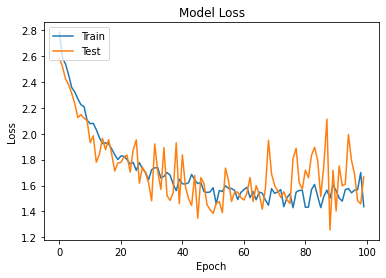

In [24]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()